**Instructor**: Prof. Peter Beerel (pabeerel@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import datasets

# Clustering

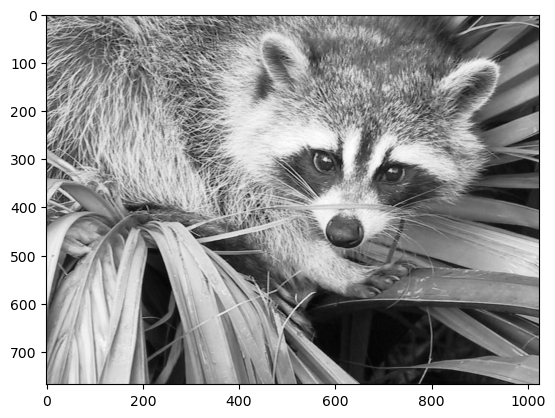

In [2]:
image_raccoon = datasets.face(gray=True)
plt.imshow(image_raccoon,cmap=plt.cm.Greys_r) 

In [3]:
nrows = image_raccoon.shape[0]
ncolumns = image_raccoon.shape[1]

In [ ]:
def algorithm_kmeans(k_clusters, image_raccoon, max_iterations):
    import random, numpy as np
    
    pixel_vals = image_raccoon.reshape((-1,1)).astype(float)
    
    mean_clusters = random.sample(list(pixel_vals), k_clusters)
    mean_clusters = np.array(mean_clusters).reshape(k_clusters)
    
    nrows = pixel_vals.shape[0]

    for i in range(max_iterations):
        classes_clusters = {k: [] for k in range(k_clusters)}
        for idx in range(nrows):
            distances = (mean_clusters - pixel_vals[idx, 0])**2
            cluster_idx = np.argmin(distances)
            classes_clusters[cluster_idx].append(idx)
        
        new_mean_clusters = np.zeros(k_clusters)
        for k in range(k_clusters):
            if classes_clusters[k]:
                new_mean_clusters[k] = np.mean(pixel_vals[classes_clusters[k], 0])
            else:
                new_mean_clusters[k] = mean_clusters[k]
        
        if np.allclose(mean_clusters, new_mean_clusters):
            print("Number of Iterations until Convergence: ", i)
            return mean_clusters.tolist(), classes_clusters
        
        mean_clusters = new_mean_clusters
    
    return mean_clusters.tolist(), classes_clusters


In [8]:
def image_plotting_kmeans(k,image_raccoon, mean_clusters,classes_clusters):
    nrows = image_raccoon.shape[0]
    ncolumns = image_raccoon.shape[1]
    segmented_data = np.zeros(nrows*ncolumns)
    for i in range(0,len(mean_clusters)):
        points_cluster = classes_clusters[i]
        for j in points_cluster:
            segmented_data[j] = mean_clusters[i]
    segmented_image = segmented_data.reshape(image_raccoon.shape)
    plt.imshow(segmented_image,cmap=plt.cm.Greys_r) 
    plt.title(f"k=%d" % k)
    plt.show()

Number of Clusters:  2
Number of Iterations until Convergence:  8


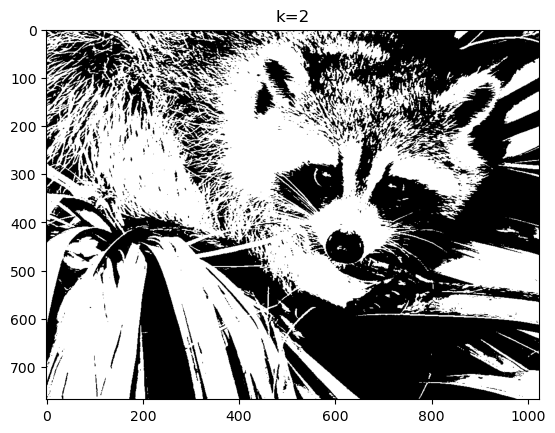

Number of Clusters:  4
Number of Iterations until Convergence:  9


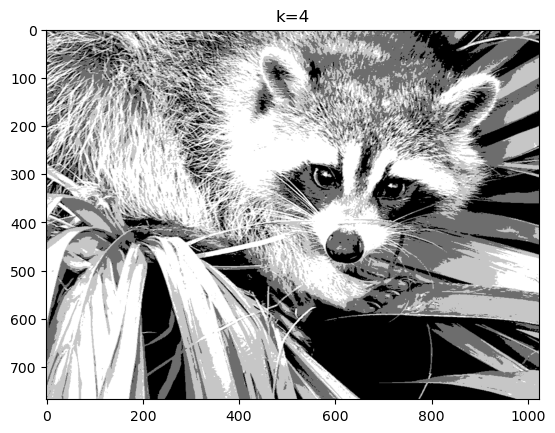

In [9]:
for k in [2, 4]:
    print('Number of Clusters: ',k )
    mean_clusters = []; classes_clusters = []
    mean_clusters, classes_clusters = algorithm_kmeans(k,image_raccoon,max_iterations=50)
    mean_clusters = np.uint8(mean_clusters).tolist()
    image_plotting_kmeans(k,image_raccoon,mean_clusters,classes_clusters)